In [7]:
import json

pos = 0
neg = 0
rewards = []
with open('../data/trajectories_100_0.5_1.0.jsonl', 'r') as trajectories_file:
    for line in trajectories_file:
        outputs = json.loads(line)
        rewards.append([sample['reward'] for sample in outputs['samples']])
        if any([sample['reward'] > 0 for sample in outputs['samples']]):
            pos += 1
        else:
            neg += 1
print(f'Positive: {pos}, Negative: {neg}')

Positive: 9, Negative: 1


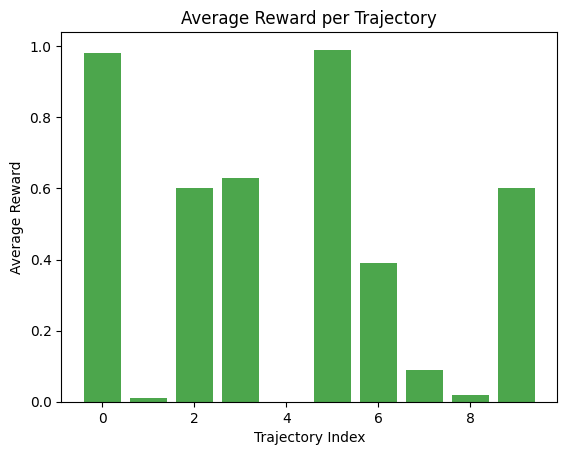

In [12]:
import matplotlib.pyplot as plt

avg_rewards = [np.mean(trajectory) for trajectory in rewards]
plt.bar(range(len(avg_rewards)), avg_rewards, color='green', alpha=0.7)
plt.title('Average Reward per Trajectory')
plt.xlabel('Trajectory Index')
plt.ylabel('Average Reward')
plt.show()

In [13]:
total_rewards = sum([len(trajectory) for trajectory in rewards])
total_positive = sum([sum(trajectory) for trajectory in rewards])
proportion_positive = total_positive / total_rewards

print(f"Proportion of Positive Rewards: {proportion_positive:.2%}")

Proportion of Positive Rewards: 43.10%


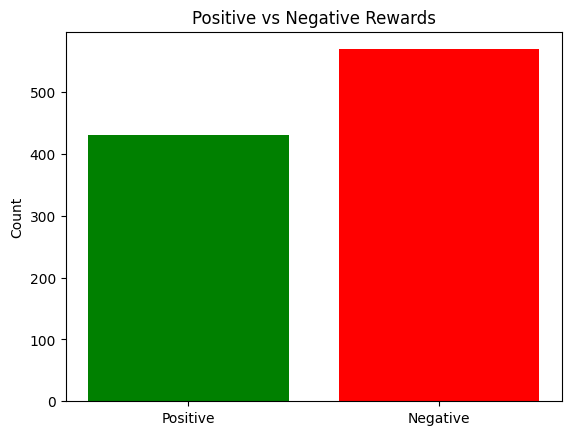

In [14]:
total_positive = sum([sum(trajectory) for trajectory in rewards])
total_negative = sum([len(trajectory) - sum(trajectory) for trajectory in rewards])

import matplotlib.pyplot as plt
plt.bar(['Positive', 'Negative'], [total_positive, total_negative], color=['green', 'red'])
plt.title('Positive vs Negative Rewards')
plt.ylabel('Count')
plt.show()

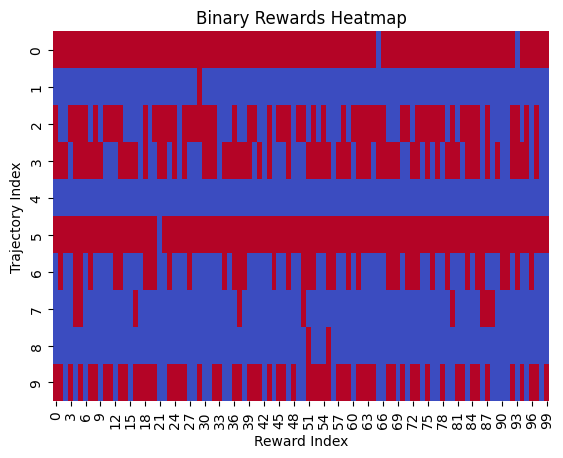

In [17]:
import seaborn as sns

sns.heatmap(rewards, cmap='coolwarm', cbar=False)
plt.title('Binary Rewards Heatmap')
plt.xlabel('Reward Index')
plt.ylabel('Trajectory Index')
plt.show()